In [12]:
import cv2
import numpy as np
from skimage import exposure
import matplotlib.pyplot as plt

In [39]:
# Carregar as imagens de origem e destino
img_src = cv2.imread('src.png')
img_dst = cv2.imread('ref.png')

In [40]:
# Converter as imagens para o espaço de cores HSV
img_src_hsv = cv2.cvtColor(img_src, cv2.COLOR_BGR2HSV)
img_dst_hsv = cv2.cvtColor(img_dst, cv2.COLOR_BGR2HSV)

In [41]:
# Equalizar o histograma da imagem de origem
img_src_hsv[:, :, 2] = cv2.equalizeHist(img_src_hsv[:, :, 2])

# Calcular os histogramas normalizados das imagens
hist_src, bins = np.histogram(img_src_hsv[:, :, 0], 256, [0, 256])
hist_dst, bins = np.histogram(img_dst_hsv[:, :, 0], 256, [0, 256])
hist_src_norm = hist_src / float(img_src_hsv.shape[0] * img_src_hsv.shape[1])
hist_dst_norm = hist_dst / float(img_dst_hsv.shape[0] * img_dst_hsv.shape[1])

In [42]:
# Calcular as distribuições cumulativas dos histogramas normalizados
cum_src = hist_src_norm.cumsum()
cum_dst = hist_dst_norm.cumsum()

# Mapear os valores do canal H da imagem de origem para a imagem de destino
lut = np.interp(cum_src, cum_dst, np.arange(256))
img_src_hsv[:, :, 0] = cv2.LUT(img_src_hsv[:, :, 0], lut)

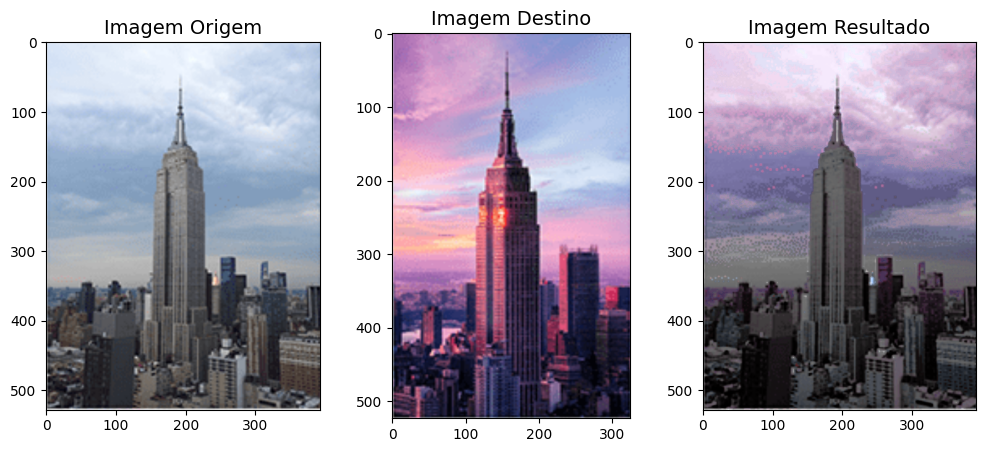

In [43]:
# Converter a imagem de volta para o espaço de cores BGR
img_src_matched = cv2.cvtColor(img_src_hsv, cv2.COLOR_HSV2RGB)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 5))

ax1.imshow(cv2.cvtColor(img_src,cv2.COLOR_BGR2RGB))
ax1.set_title("Imagem Origem", fontsize=14)
ax2.imshow(cv2.cvtColor(img_dst,cv2.COLOR_BGR2RGB))
ax2.set_title("Imagem Destino", fontsize=14)
ax3.imshow(img_src_matched)
ax3.set_title("Imagem Resultado", fontsize=14)
plt.show()